In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

In [169]:
def load_all_data(dir, filecnt=54):
    data = [None]*10
    t = np.zeros((10, filecnt), int)
    for p in range(10):
        d = [None]*filecnt
        for i in range(filecnt):
            d[i] = np.load(f"{dir}/{p}/{i+1}.npy")
            t[p,i] = d[i].shape[0]
        data[p] = d
    return data, t

def match_length(d, t:int):
    """
    return (pattern, N, times(t), 2) shape numpy array
    """
    x = np.zeros((len(d), len(d[0]), t, 2), np.float64)
    target_timepoints = np.linspace(0, 1, t)
    for r in range(len(d)):
        for c in range(len(d[r])):
            origin_timepoints = np.linspace(0, 1, d[r][c].shape[0])
            x[r, c, :, 0] = np.interp(target_timepoints, origin_timepoints, d[r][c][:,0])
            x[r, c, :, 1] = np.interp(target_timepoints, origin_timepoints, d[r][c][:,1])
    return x      

def apply_normalize(d):
    for r in range(len(d)):
        for c in range(len(d[r])):
            d[r][c][:,0] = d[r][c][:,0] - d[r][c][0,0]
            d[r][c][:,1] = d[r][c][:,1] - d[r][c][0,1]
    
def plot_data(d):
    plt.figure(figsize=(20,4))
    plt.subplot(2,1,1)
    gca = plt.gca()
    gca.plot(d[:,0])
    plt.subplot(2,1,2)
    gca = plt.gca()
    gca.plot(d[:,1])
    plt.tight_layout()
    plt.show()

#https://stackoverflow.com/questions/10252412/matplotlib-varying-color-of-line-to-capture-natural-time-parameterization-in-da/10253183#10253183
# #plot line with color through time
from matplotlib.collections import LineCollection
def draw_gradation(x, y, axes, cmap_name="gist_rainbow"):
    t = np.linspace(0, 1, x.shape[0])
    points = np.array([x, y]).transpose().reshape(-1, 1, 2)
    segs = np.concatenate([points[:-1],points[1:]],axis=1)
    # make the collection of segments
    lc = LineCollection(segs, cmap=plt.get_cmap(cmap_name))
    lc.set_array(t) # color the segments by our parameter

    # plot the collection
    axes.add_collection(lc) # add the collection to the plot
    axes.set_xlim(x.min(), x.max()) # line collections don't auto-scale the plot
    axes.set_ylim(y.min(), y.max())


def plot_data2(d, save=None):
    fig, axes = plt.subplot_mosaic("abbbb;acccc", figsize=(20,4))
    draw_gradation(d[:,0], d[:,1], axes["a"],cmap_name="gist_rainbow")
    draw_gradation(np.arange(d.shape[0]), d[:,0], axes["b"],cmap_name="gist_rainbow")
    draw_gradation(np.arange(d.shape[0]), d[:,1], axes["c"],cmap_name="gist_rainbow")

    plt.tight_layout()
    if save is None:
        plt.show()
    else:
        plt.savefig(save)
        plt.close()

In [172]:
data, t = load_all_data("/home/user/workspace/research/eye-writing/self_data/")
apply_normalize(data)
x = match_length(data, 128)
x.shape

(10, 54, 128, 2)

In [170]:
# target_data = data
# save_dir = "/home/user/img"
# for r in range(len(target_data)):
#     for c in range(len(target_data[r])):
#         plot_data2(target_data[r][c], f"{save_dir}/Pattern_{r}_Index_{c}.png")

In [175]:
x = np.reshape(x, (-1,x.shape[-2], x.shape[-1]))
x.shape

(540, 128, 2)

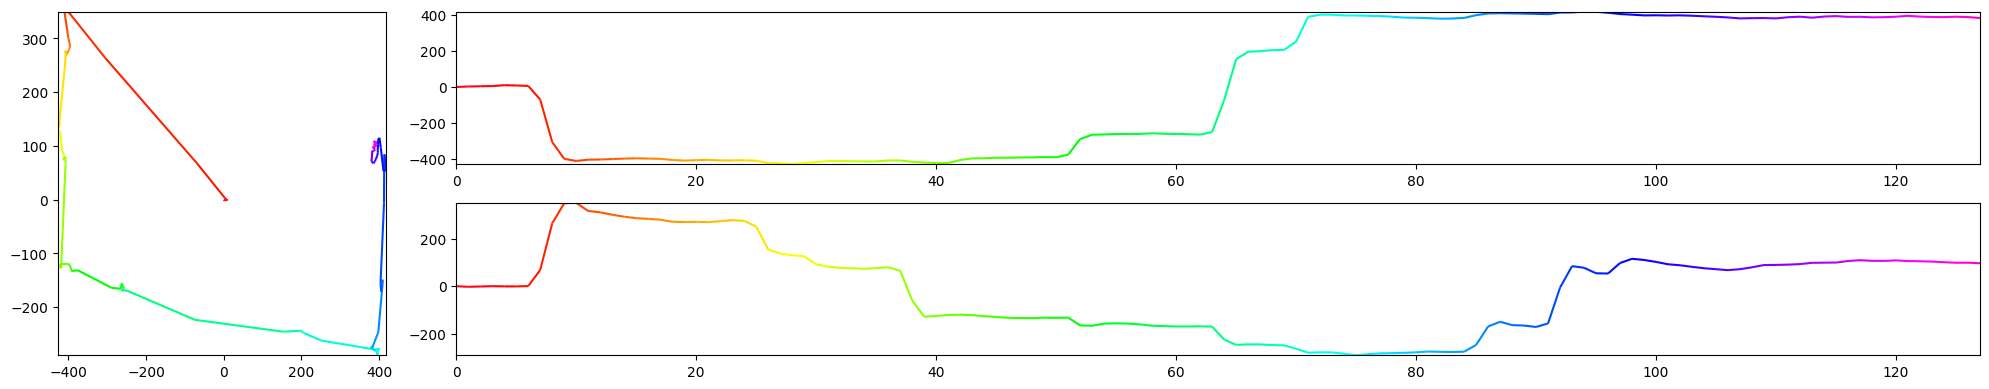

In [176]:
plot_data2(x[0], None)

TIMEGAN

In [171]:
#Importing the required libs for the exercise

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ydata_synthetic.synthesizers import ModelParameters
from ydata_synthetic.preprocessing.timeseries import processed_stock
from ydata_synthetic.synthesizers.timeseries import TimeGAN

In [177]:
#Specific to TimeGANs
seq_len=x.shape[1]
n_seq = x.shape[2]
hidden_dim=24
gamma=1

noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
learning_rate = 5e-4

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           noise_dim=noise_dim,
                           layers_dim=dim)

In [178]:
synth = TimeGAN(model_parameters=gan_args, hidden_dim=24, seq_len=seq_len, n_seq=n_seq, gamma=1)
synth.train(x, train_steps=50000)

2023-01-11 07:55:50.070241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-11 07:55:50.097760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-11 07:55:50.098091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-11 07:55:50.104200: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [ ]:
synth_data = synth.sample(len(x))
print(synth_data.shape)